Contains plots used in the paper.
Plots of the multif0 output of the same track for each algorithm

In [1]:
import numpy as np
import os
import medleydb as mdb
import codecs
import matplotlib.patches as mp
import glob
import mir_eval
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
cd ../deepsalience/

/scratch/rmb456/multif0/deepsalience


In [3]:
import compute_training_data as C
import evaluate

/home/rmb456/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
cd ../notebooks/

/scratch/rmb456/multif0/notebooks


In [5]:
def mf0_to_plot_array(times, freqs):
    plot_times = []
    plot_freqs = []
    for t, freq in zip(times, freqs):
        for f in freq:
            plot_times.append(t)
            plot_freqs.append(f)
    return plot_times, plot_freqs

In [6]:
def load_multif0_cnn(fpath):
    with open(fpath, 'r') as fhandle:
        reader = csv.reader(fhandle, delimiter='\t')
        freqs = [line for line in reader]
        times = C.get_time_grid(len(freqs))
    return times, freqs

### plot for bach10

In [56]:
trackid = '05_DieNacht'
cnn_npy = "../experiment_output_submission/multif0_exper11_batchin/{}_prediction.npy".format(trackid)
benetos_output = '../comparisons/multif0/algorithm_outputs/bach10/benetos/{}.txt'.format('-'.join(trackid.split('_')))
duan_output = '../comparisons/multif0/algorithm_outputs/bach10/duan/{}_multif0_mirexf0.txt'.format(trackid)
gt_output = '../comparisons/multif0/datasets/bach10/gt_F0/{}_GTF0s.txt'.format(trackid)
yticks = [64*2, 64*4, 64*8]
xticks = [0, 2.5, 5, 7.5, 10]
xlim = [0, 10]
ylim = [100, 600]
loc = 3

In [36]:
trackid = 'SQ01_Beethoven'
cnn_npy = "../experiment_output_submission/multif0_exper11_batchin/{}_prediction.npy".format(trackid)
benetos_output = '../comparisons/multif0/algorithm_outputs/su/benetos/{}.txt'.format(trackid)
duan_output = '../comparisons/multif0/algorithm_outputs/su/duan/{}_audiomirexf0.txt'.format(trackid)
gt_output = '../comparisons/multif0/datasets/su/gt_F0/{}_F0.txt'.format(trackid)
yticks = [64, 64*2, 64*4, 64*8, 64*16]
xticks = [0, 12, 24, 36]
xlim = [0, 35]
ylim = [50, 2200]
loc = 2

In [44]:
trackid = 'CelestialShore_DieForUs'
cnn_npy = "../experiment_output_submission/multif0_exper11_batchin/{}_prediction.npy".format(trackid)
benetos_output = '../comparisons/multif0/algorithm_outputs/mdb_test/benetos/{}_multif0_MIX16.wav.txt'.format(trackid)
duan_output = '../comparisons/multif0/algorithm_outputs/mdb_test/duan/{}_multif0_MIX16mirexf0.txt'.format(trackid)
gt_output = '../comparisons/multif0/datasets/mdb_test/gt_F0/{}.txt'.format(trackid)
yticks = [64, 64*2, 64*4, 64*8, 64*16]
xticks = [60, 70, 80, 90]
xlim = [60, 90]
ylim = [50, 2048]
loc = 2

In [57]:
Y = np.load(cnn_npy)
c_times, c_freqs = evaluate.pitch_activations_to_mf0(Y, 0.3)
b_times, b_freqs = mir_eval.io.load_ragged_time_series(benetos_output)
d_times, d_freqs = mir_eval.io.load_ragged_time_series(duan_output)
g_times, g_freqs = mir_eval.io.load_ragged_time_series(gt_output)

In [58]:
ct, cf = mf0_to_plot_array(c_times, c_freqs)
bt, bf = mf0_to_plot_array(b_times, b_freqs)
dt, df = mf0_to_plot_array(d_times, d_freqs)
gt, gf = mf0_to_plot_array(g_times, g_freqs)

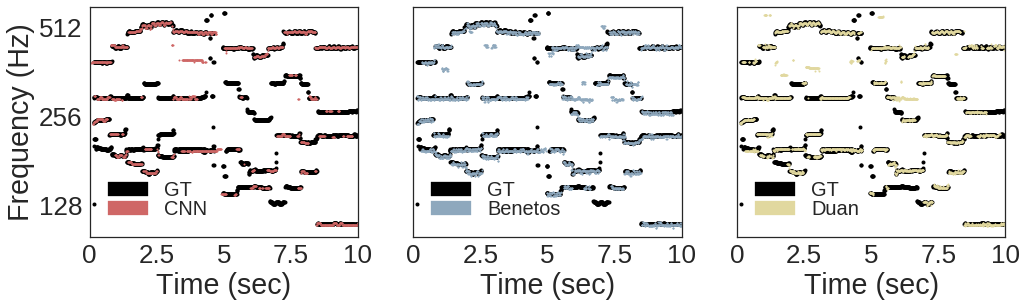

In [59]:
sns.set(font_scale=2.6)
lgd_fontsize = 20
labelspacing = 0.0
sns.set_style('white')

colors = ["#E1D89F", "#8EA8BD", "#CF6766"]

cnn = mp.Patch(color=colors[2], label='CNN')
ben = mp.Patch(color=colors[1], label='Benetos')
dua = mp.Patch(color=colors[0], label='Duan')
gnd = mp.Patch(color='k', label="GT")

plt.figure(figsize=(15, 5))
# plt.suptitle(trackid)
plt.subplot(1, 3, 1)
plt.semilogy(gt, gf, '.k', basey=2, markersize=8)
plt.semilogy(ct, cf, '.', color=colors[2], basey=2, markersize=4)
plt.xlim(xlim)
plt.ylim(ylim)
plt.yticks(yticks, yticks)
plt.xticks(xticks, xticks)
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.legend(handles=[gnd, cnn], loc=loc, fontsize=lgd_fontsize, labelspacing=labelspacing)

plt.subplot(1, 3, 2)
plt.semilogy(gt, gf, '.k', basey=2, markersize=8)
plt.semilogy(bt, bf, '.', basey=2, color=colors[1], markersize=4)
plt.xlim(xlim)
plt.ylim(ylim)
plt.yticks([])
plt.xticks(xticks, xticks)
plt.xlabel("Time (sec)")
plt.legend(handles=[gnd, ben], loc=loc, fontsize=lgd_fontsize, labelspacing=labelspacing)

plt.subplot(1, 3, 3)
plt.semilogy(gt, gf, '.k', basey=2, markersize=8)
plt.semilogy(dt, df, '.', basey=2, color=colors[0], markersize=4)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xticks(xticks, xticks)
plt.yticks([])
plt.xlabel("Time (sec)")
plt.legend(handles=[gnd, dua], loc=loc, fontsize=lgd_fontsize, labelspacing=labelspacing)

plt.tight_layout()
plt.subplots_adjust(wspace=None, hspace=None)

plt.savefig("../paper-figs/{}_mf0_comparison.pdf".format(trackid), format='pdf', bbox_inches='tight')